In [1]:

import matplotlib.pyplot as plt
import numpy as np
import time
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
cwd = os.getcwd()
cwd

'C:\\Users\\thibault\\Desktop\\armee\\Hackaton\\python'

In [2]:

def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]
    

In [3]:
   
def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]


In [4]:
def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm
    

In [5]:
def get_pics_from_file(filename):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+filename)
    f_pic = open(filename, "rb")
    info = dict()
    info["nb_pics"] = read_int(f_pic)
    print("Nb pics par trame: " + str(info["nb_pics"]))
    info["freq_sampling_khz"] = read_double(f_pic)
    print("Frequence d'echantillonnage: " + str(info["freq_sampling_khz"]) + " kHz")
    info["freq_trame_hz"] = read_double(f_pic)
    print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
    info["freq_pic_khz"] = read_double(f_pic)
    print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
    info["norm_fact"] = read_double(f_pic)
    print("Facteur de normalisation: " + str(info["norm_fact"]))
    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    print("Nb trames: " + str(nb_trames))
    f_pic.close()
    return tab_pics, info


Ouverture du fichier de pics ../data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802
Ouverture du fichier de pics ../data/pics_B.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7640


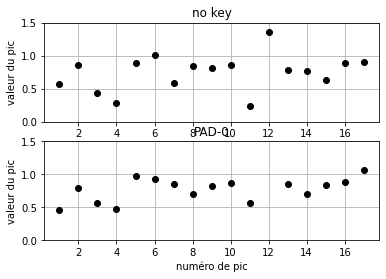

In [6]:
pics_nokey, info = get_pics_from_file("../data/pics_NOKEY.bin")
pics_pad0, info = get_pics_from_file("../data/pics_B.bin")

    ######### Pics ############
    # NO KEY
plt.figure(1)
plt.subplot(211)
plt.plot(range(1,info["nb_pics"]+1), pics_pad0[2], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('no key')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')
    # PAD-0
plt.subplot(212)
plt.plot(range(1,info["nb_pics"]+1), pics_pad0[1], 'ko')
plt.xlabel('numéro de pic')
plt.ylabel('valeur du pic')
plt.title('PAD-0')
plt.ylim(0, 1.5)
plt.grid(b=True, which='both')
    #
plt.show()


In [7]:
pics_nokey[0]

array([0.7244873 , 0.34118652, 0.30456543, 0.84960938, 0.98022461,
       0.66711426, 0.5682373 , 0.62133789, 0.86303711, 0.11535645,
       0.58532715, 0.44616699, 0.30029297, 0.71289062, 0.45227051,
       0.5279541 , 0.15563965])

In [8]:
pics_pad0[0]

array([0.64758301, 0.87768555, 1.02172852, 1.05529785, 0.4083252 ,
       0.2746582 , 0.21972656, 0.32104492, 0.28747559, 0.3302002 ,
       0.38574219, 0.28320312, 0.31433105, 0.31616211, 0.29296875,
       0.28625488, 0.28076172])

In [9]:
pics_pad0[1]

array([0.45654297, 0.79406738, 0.55969238, 0.46813965, 0.97045898,
       0.92712402, 0.85083008, 0.7019043 , 0.83068848, 0.87463379,
       0.5682373 , 1.72241211, 0.859375  , 0.7019043 , 0.83679199,
       0.88256836, 1.05957031])

In [10]:
## a chaque fois ya 17 trames pour chaque exemple de cle presser
## il y a par exemple 7577 exemple pour la touche Q
len(pics_pad0)

7639

In [11]:
def generate_df(pics, label):
    df =  pd.DataFrame.from_records(pics)
    df['label'] = label
    return df

In [12]:

def mean_from_pic(pics):
    arr = np.zeros(len(pics[0]))
    for i in range(len(arr)):
        for pic in pics:
            arr[i] += pic[i]
        arr[i] /= len(pics)
    return arr

In [13]:
alphanum = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
touchesspe = ["CTRL", "ENTER", "NOKEY", "SHIFT", "SPACE", "SUPPR"]
df = pd.DataFrame()
for c in alphanum:
    pics, info = get_pics_from_file("../data/pics_" + c + ".bin")
    df = df.append(generate_df(pics, c))
for c in touchesspe:
    pics, info = get_pics_from_file("../data/pics_" + c + ".bin")
    df = df.append(generate_df(pics, c))

Ouverture du fichier de pics ../data/pics_A.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7610
Ouverture du fichier de pics ../data/pics_B.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7640
Ouverture du fichier de pics ../data/pics_C.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7777
Ouverture du fichier de pics ../data/pics_D.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7847
Ouverture du fichier de pics ../data/pics_E.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normal

In [14]:
X = df[df.columns[:-1]]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
print("Accuracy on training set is : {}".format(clf.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, y_test))) #56            99.5

pics_loginmdp, info = get_pics_from_file("../data/pics_LOGINMDP.bin")

    #print(y_test.iloc[0])
y_pred = pd.DataFrame(clf.predict(pics_loginmdp))
y_pred

y_pred.to_csv("result.csv")

Accuracy on training set is : 0.9999715595137489
Accuracy on test set is : 0.5560369345113951
Ouverture du fichier de pics ../data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102


,0
0,NOKEY
1,CTRL
2,NOKEY
3,NOKEY
4,NOKEY
...,...
11096,NOKEY
11097,NOKEY
11098,NOKEY
11099,NOKEY


KeyError: 0

In [37]:
y_pred

,0
0,NOKEY
1,7
2,NOKEY
3,NOKEY
4,NOKEY
...,...
11096,NOKEY
11097,NOKEY
11098,NOKEY
11099,NOKEY
